In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [35]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [5]:
rawData = pd.read_csv('toyData.csv', sep=',')
rawData.head()

,Price,AllFuelsGen,NatGasGen,HydroGen,RenewablesGen,GDP,AvgTemp,AvgRelHum,NatGasPrice,TotElecNetGen,TotNatGasCons,TotRetailElecSales
0,11.07,14657.59,7418.12,1685.15,1689.59,1627.98,52.57,54.51,3.90,305.50,2120.20,19959.27
1,11.32,14591.10,6687.45,2515.53,1812.00,1631.46,54.04,47.27,3.79,319.94,2487.64,19863.79
2,11.17,12655.47,5888.04,1920.92,1626.95,1634.93,59.60,38.86,3.76,281.83,2242.43,17781.30
3,11.35,15788.66,7704.10,2452.48,1933.86,1638.40,55.29,51.49,3.84,302.55,2258.43,18227.13
4,10.99,13995.83,5634.56,2913.90,1895.40,1641.88,57.28,70.29,4.21,289.85,1880.99,18614.31


In [6]:
shiftMonths = 24

In [7]:
dfTargets = rawData.shift(-shiftMonths)

In [8]:
dfTargets.head()

,Price,AllFuelsGen,NatGasGen,HydroGen,RenewablesGen,GDP,AvgTemp,AvgRelHum,NatGasPrice,TotElecNetGen,TotNatGasCons,TotRetailElecSales
0,11.26,15249.50,7152.61,2479.54,1897.01,1745.04,54.23,45.68,5.89,331.68,2263.66,20861.67
1,11.08,15284.73,7165.57,2741.77,1807.98,1752.36,54.91,45.74,6.41,346.55,2675.83,20188.61
2,11.41,14469.30,7261.82,2509.35,1768.38,1930.88,51.61,54.76,6.35,314.28,2511.10,17876.56
3,10.98,15867.47,7721.33,3562.45,1932.44,1766.98,64.09,53.14,6.23,308.81,2100.92,19782.73
4,10.23,15347.64,7544.69,3441.20,1948.85,1774.29,61.91,60.70,6.31,290.56,1745.17,19642.47


In [9]:
xData = rawData.values[0:-shiftMonths]

In [10]:
print(type(xData))
print("Shape:", xData.shape)

<class 'numpy.ndarray'>
Shape: (146, 12)


In [11]:
yData = dfTargets.values[:-shiftMonths,0]

In [12]:
print(type(yData))
print("Shape:", yData.shape)

<class 'numpy.ndarray'>
Shape: (146,)


In [62]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.20, random_state=0)
print ('Number of samples in training data:',len(xTrain))
print ('Number of samples in test data:',len(xTest))

Number of samples in training data: 116
Number of samples in test data: 30


In [63]:
xScaler = MinMaxScaler()

In [64]:
xTrainScaled = xScaler.fit_transform(xTrain)

In [65]:
print("Min:", np.min(xTrainScaled))
print("Max:", np.max(xTrainScaled))

Min: 0.0
Max: 1.0000000000000004


In [66]:
xTestScaled = xScaler.transform(xTest)

In [67]:
yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

In [68]:
yScaler = MinMaxScaler()
yTrainScaled = yScaler.fit_transform(yTrain)
yTestScaled = yScaler.transform(yTest)

In [69]:
print(xTrainScaled.shape)
print(yTrainScaled.shape)

(116, 12)
(116, 1)


In [70]:
# reshape input to be 3D [samples, timesteps, features]
xTrainScaled = xTrainScaled.reshape((xTrainScaled.shape[0], 1, xTrainScaled.shape[1]))
xTestScaled = xTestScaled.reshape((xTestScaled.shape[0], 1, xTestScaled.shape[1]))
print(xTrainScaled.shape, yTrainScaled.shape, xTestScaled.shape, yTestScaled.shape)

(116, 1, 12) (116, 1) (30, 1, 12) (30, 1)


In [26]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(xTrainScaled.shape[1], xTrainScaled.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                12600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fit network
history = model.fit(xTrainScaled, yTrainScaled, epochs=50, batch_size=12, validation_data=(xTestScaled, yTestScaled), verbose=2, shuffle=False)

Train on 116 samples, validate on 30 samples
Epoch 1/50
 - 19s - loss: 0.3774 - val_loss: 0.2879
Epoch 2/50
 - 19s - loss: 0.2425 - val_loss: 0.1713
Epoch 3/50
 - 19s - loss: 0.1503 - val_loss: 0.1388
Epoch 4/50
 - 19s - loss: 0.1348 - val_loss: 0.1419
Epoch 5/50
 - 19s - loss: 0.1301 - val_loss: 0.1320
Epoch 6/50
 - 19s - loss: 0.1211 - val_loss: 0.1218
Epoch 7/50
 - 19s - loss: 0.1156 - val_loss: 0.1155
Epoch 8/50
 - 19s - loss: 0.1111 - val_loss: 0.1106
Epoch 9/50
 - 18s - loss: 0.1062 - val_loss: 0.1076
Epoch 10/50
 - 19s - loss: 0.1023 - val_loss: 0.1049
Epoch 11/50
 - 20s - loss: 0.0988 - val_loss: 0.1009
Epoch 12/50
 - 18s - loss: 0.0954 - val_loss: 0.0976
Epoch 13/50
 - 18s - loss: 0.0924 - val_loss: 0.0952
Epoch 14/50
 - 19s - loss: 0.0891 - val_loss: 0.0917
Epoch 15/50
 - 18s - loss: 0.0862 - val_loss: 0.0887
Epoch 16/50
 - 18s - loss: 0.0831 - val_loss: 0.0862
Epoch 17/50
 - 18s - loss: 0.0801 - val_loss: 0.0825
Epoch 18/50
 - 19s - loss: 0.0779 - val_loss: 0.0805
Epoch 19/5

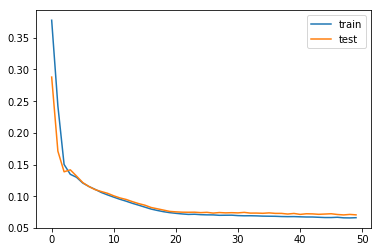

In [29]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [71]:
# make a prediction
yPredTest = model.predict(xTestScaled)
yPredTrain = model.predict(xTrainScaled)

In [72]:
# invert scaling for test
xTestScaled = xTestScaled.reshape((xTestScaled.shape[0], xTestScaled.shape[2]))
yPredTestRescaled = concatenate((yPredTest, xTestScaled[:, 1:]), axis=1)
yPredTestRescaled = yScaler.inverse_transform(yPredTestRescaled)
yPredTestRescaled = yPredTestRescaled[:,0]

In [78]:
# invert scaling for training
xTrainScaled = xTrainScaled.reshape((xTrainScaled.shape[0], xTrainScaled.shape[2]))
yPredTrainRescaled = concatenate((yPredTrain, xTrainScaled[:, 1:]), axis=1)
yPredTrainRescaled = yScaler.inverse_transform(yPredTrainRescaled)
yPredTrainRescaled = yPredTrainRescaled[:,0]

In [80]:
t = np.arange(len(rawData['Price']) - shiftMonths)

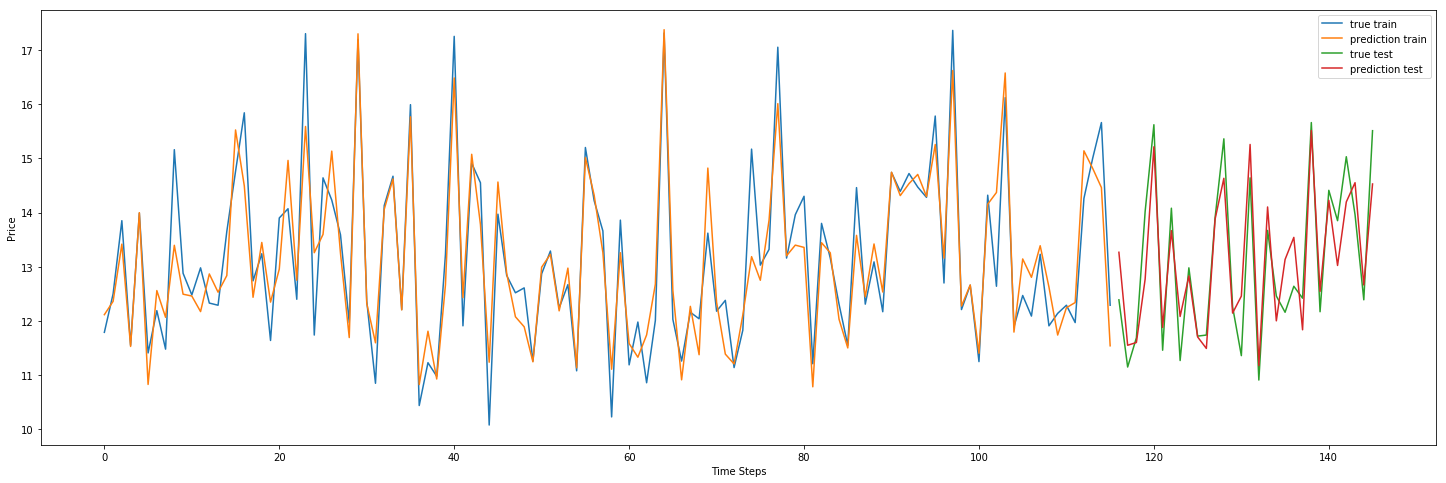

In [81]:
# Make the plotting-canvas bigger.
plt.figure(figsize=(25,8))
        
# Plot and compare the two signals.
plt.plot(t[:len(yTrain)], yTrain, label='true train')
plt.plot(t[:len(yTrain)], yPredTrainRescaled, label='prediction train')
plt.plot(t[len(yTrain):], yTest, label='true test')
plt.plot(t[len(yTrain):], yPredTestRescaled, label='prediction test')

# Plot labels etc.
plt.xlabel('Time Steps') # in number of months
plt.ylabel('Price')
plt.legend()
plt.show()